# Near-Antarctic class: profile distribution

## Load modules

In [37]:
# modules in this package
import load_and_preprocess as lp
import plot_tools as pt
import file_io as io
import density
import xarray
# plotting tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import xarray as xr
import numpy as np
# os tools
import os.path
import netCDF4 as nc
import gsw
from   datetime              import date             # for saving figures with today's date

# Packages for map
import matplotlib
import matplotlib.pyplot     as plt                    # needed to make map setup
import matplotlib.path       as mpath                  # to draw circle for map
import matplotlib.patches    as mpatches               # to draw boxes on map  

import cmocean                                         # to add colorbars
from   cmocean           import cm as cmo
import cartopy                                         # to make map
import cartopy.crs           as     ccrs               # for map projection
import cartopy.feature       as     cfeature           # to add land features to map
from   mycolorpy import colorlist as mcp               # to get n colors list

# warnings setup
import warnings
warnings.filterwarnings('ignore')

## Set some parameters

### Weddell Only parameters

In [2]:
# set locations and names
descrip = 'WeddellOnly' # extra description for filename
data_location = '../../so-chic-data/' # input data location
classified_data_location = 'models/profiles_-65to80lon_-85to-30lat_20to1000depth_5K_allDomain_revised.nc'
ploc = 'plots/plots_WeddellClassOnly_top1000m_K04_forOSM22_forPaper/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)

# single class from previous effort to sub-classify
# don't forget 0 indexing
myClass=1

#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0

# ranges
lon_range = (lon_min, lon_max)
lat_range = (lat_min, lat_max)
depth_range = (zmin, zmax)

# temperature and salinity ranges for plotting
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)
sig0range = (26.6, 28.0)

# font size for plotting
fs = 18

### Circumpolar SO parameters

In [5]:
# set locations and names
descrip       = 'circumpolarSO'                                                                                                    # extra description for filename 
data_location = '/Users/hannah/Documents/UW-PMEL/Research/so_co2_flux_repo/data/02_intermediate/SOCCOM_bgc_argo_float_data/'       # input data location
lon_name      = '-180to180lon'
lat_name      = '-85to-30lat'
depth_name    = '20to1000depth'
classified_data_location = 'models/soccom_bgc_argo_ds_' + lon_name + '_' + lat_name + '_' + depth_name + '.nc'

ploc = 'plots/plots_' + descrip + '_top1000m/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)

# single class from previous effort to sub-classify
# don't forget 0 indexing
myClass = 1
# ^ this was for selecting one of the classified classes for near Antarctic

#longitude and latitude range
lon_min = -180
lon_max =  180
lat_min = -85
lat_max = -30

# depth range
zmin = 20.0
zmax = 1000.0

# ranges
lon_range   = (lon_min, lon_max)
lat_range   = (lat_min, lat_max)
depth_range = (zmin, zmax)

# temperature and salinity ranges for plotting
Trange    = (-2.2, 6.0)
Srange    = (33.5, 35.0)
sig0range = (26.6, 28.0)

# font size for plotting
fs = 18

## Data loading and plotting

In [95]:
# load single class (just the Weddell One)
profiles_antarctic = lp.load_single_class(classified_data_location, selected_class=myClass)


# take a look at the dataset
profiles_antarctic

load_and_preprocess.load_single_class


FileNotFoundError: [Errno 2] No such file or directory: b'/Users/hannah/Documents/UW-PMEL/Research/SO_BGC_clusters_repo/src/models/soccom_bgc_argo_ds_-180to180lon_-85to-30lat_20to1000depth.nc'

## Load SOCCOM BGC floats

In [7]:
profiles_antarctic = xr.open_dataset(data_location + 'soccom_bgc_argo_ds_-180to180lon_-85to-30lat_20to1000depth.nc')

# profiles_antarctic.LATITUDE.rename('lat')
# profiles_antarctic.LONGITUDE.rename('lon')

# profiles_antarctic = profiles_antarctic.rename({'N_PROF':'profile', 'LATITUDE':'lat', 'LONGITUDE':'lon'})



# # Calculate absolute salinity, conservative temperature, and potential density anomaly

# profiles_antarctic = profiles_antarctic.assign(prof_SA    = gsw.conversions.SA_from_SP(SP = profiles_antarctic.PSAL, p = profiles_antarctic.PRES, lon = profiles_antarctic.lon, lat = profiles_antarctic.lat))

# profiles_antarctic = profiles_antarctic.assign(prof_CT    = gsw.conversions.CT_from_t(SA = profiles_antarctic.prof_SA, t = profiles_antarctic.TEMP, p = profiles_antarctic.PRES))
    
# profiles_antarctic = profiles_antarctic.assign(sigma_zero = gsw.density.sigma0(SA = profiles_antarctic.prof_SA, CT = profiles_antarctic.prof_CT))
    
    
# Look at data
profiles_antarctic

<xarray.Dataset>
Dimensions:                (profile: 1236, pressure_interp: 50)
Coordinates:
  * profile                (profile) int64 10250 10268 12759 ... 32382 27082
    lat                    (profile) float64 ...
    lon                    (profile) float64 ...
    datetime               (profile) datetime64[ns] ...
  * pressure_interp        (pressure_interp) float64 20.0 40.0 ... 980.0 1e+03
Data variables: (12/17)
    CONFIG_MISSION_NUMBER  (profile, pressure_interp) float64 ...
    CYCLE_NUMBER           (profile, pressure_interp) float64 ...
    DATA_MODE              (profile, pressure_interp) object ...
    DIRECTION              (profile, pressure_interp) object ...
    PLATFORM_NUMBER        (profile, pressure_interp) float64 ...
    pressure               (profile, pressure_interp) float64 ...
    ...                     ...
    day                    (profile, pressure_interp) float64 ...
    prof_YYYYMMDD          (profile, pressure_interp) object ...
    prof_HHMMSS            (profile, pressure_interp) object ...
    prof_SA                (profile, pressure_interp) float64 ...
    prof_CT                (profile, pressure_interp) float64 ...
    sig0                   (profile, pressure_interp) float64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           hannah
    Fetched_date:         2022/09/29
    Fetched_constraints:  phy;WMO1901378;WMO1901379;WMO1902303;WMO1902304;WMO...
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

In [17]:
profiles_antarctic.prof_SA.shape

(1446, 100)

In [25]:
profiles_antarctic.prof_CT

<xarray.DataArray 'prof_CT' (profile: 1446, PRES_INTERPOLATED: 100)>
array([[ 5.19067515,  5.1881108 ,  5.19130206, ...,  3.02127264,
         2.99783488,  2.97439765],
       [ 5.62199014,  5.60481553,  5.24626574, ...,  3.09468811,
         3.0793127 ,  3.06393544],
       [ 7.35822675,  7.3543847 ,  7.31504293, ...,  3.20191   ,
         3.18873227,  3.17555207],
       ...,
       [ 9.54297492,  8.86157816,  6.90659449, ...,  3.25063991,
         3.23496663,  3.2192916 ],
       [ 6.93558463,  6.93177506,  6.93094496, ...,  2.03510428,
         2.01900299,  2.00289989],
       [26.57468315, 26.44778223, 26.29049049, ...,  2.21532599,
         2.1787289 ,  2.14213636]])
Coordinates:
  * profile            (profile) int64 12686 12689 12692 ... 752 26720 31255
    lat                (profile) float64 52.73 52.72 52.53 ... 58.8 -47.58 0.264
    lon                (profile) float64 -32.02 -30.6 -28.33 ... 106.1 -168.8
    TIME               (profile) datetime64[ns] 2014-03-01T19:29:42 ... 2022-...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 20.0 40.0 ... 1.98e+03 2e+03
Attributes:
    casted:   1

In [28]:
profiles_antarctic.prof_CT.quantile(0.25, dim='profile').values

array([1.42186573, 1.35002316, 1.07518996, 0.85290355, 0.88176677,
       0.95161535, 1.06895152, 1.20014891, 1.36965551, 1.55408932,
       1.68849284, 1.79916824, 1.89254336, 1.9386801 , 1.97699184,
       2.00883667, 2.04601211, 2.06217336, 2.08004536, 2.09778168,
       2.11388201, 2.13687845, 2.13762342, 2.14695621, 2.14388756,
       2.13265255, 2.13148492, 2.14910671, 2.14468775, 2.14064237,
       2.12121173, 2.12042616, 2.11226817, 2.1040042 , 2.09332986,
       2.08326776, 2.07054801, 2.06197441, 2.04618324, 2.04241331,
       2.03469729, 2.02287133, 2.0063438 , 1.99538037, 1.97939915,
       1.9633617 , 1.95149298, 1.93272065, 1.91599274, 1.90328331,
       1.88562686, 1.86748213, 1.85008895, 1.83231266, 1.81354624,
       1.79448285, 1.77907618, 1.76249254, 1.74467535, 1.72577871,
       1.70804674, 1.68878811, 1.67051991, 1.65176995, 1.63259355,
       1.61296892, 1.59555877, 1.57818659, 1.55680322, 1.53680213,
       1.51655508, 1.50426088, 1.480082  , 1.46224059, 1.44541

In [30]:
profiles_antarctic.depth(dim='profile').values.shape

TypeError: 'DataArray' object is not callable

In [24]:
max(map(max, profiles_antarctic.PRES.values))

2003.780029296875

In [25]:
min(map(min, profiles_antarctic.PRES.values))

0.8399999737739563

In [30]:
np.linspace(20, 2000, 100)

array([  20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.,
        200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,  360.,
        380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,  540.,
        560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,  720.,
        740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,  900.,
        920.,  940.,  960.,  980., 1000., 1020., 1040., 1060., 1080.,
       1100., 1120., 1140., 1160., 1180., 1200., 1220., 1240., 1260.,
       1280., 1300., 1320., 1340., 1360., 1380., 1400., 1420., 1440.,
       1460., 1480., 1500., 1520., 1540., 1560., 1580., 1600., 1620.,
       1640., 1660., 1680., 1700., 1720., 1740., 1760., 1780., 1800.,
       1820., 1840., 1860., 1880., 1900., 1920., 1940., 1960., 1980.,
       2000.])

## Plot histogram of profile locations 

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


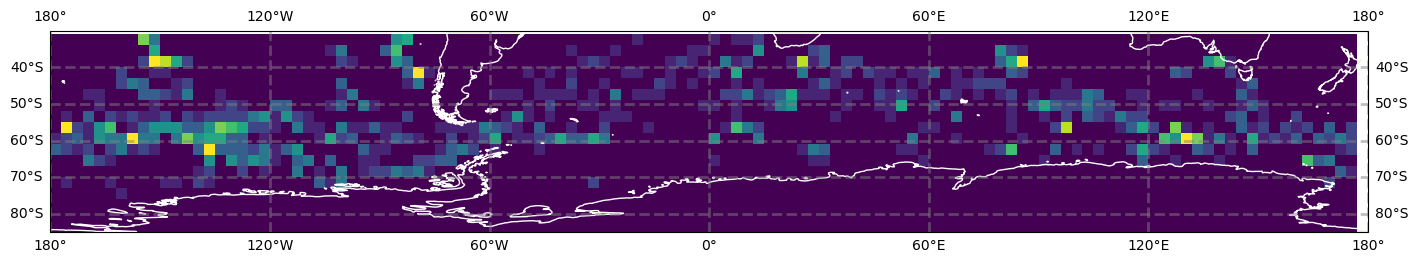

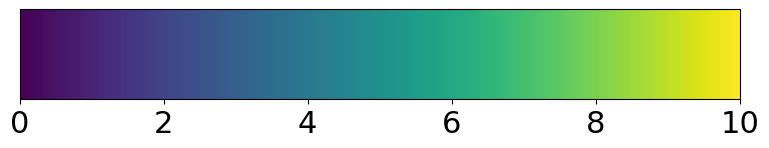

In [4]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, profiles_antarctic, lon_range, lat_range, source='all', binsize=3, vmax=10)

### Profile distribution by year 

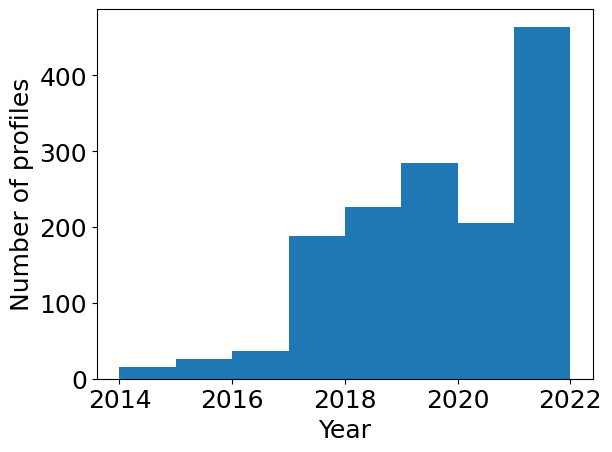

In [4]:
# histogram of distribution by year
xr.plot.hist(profiles_antarctic.year, bins=np.arange(profiles_antarctic.year.min(), profiles_antarctic.year.max()+1))
plt.xlabel('Year', fontsize=fs)
plt.ylabel('Number of profiles', fontsize=fs)
plt.tick_params(axis='x', labelsize=fs)
plt.tick_params(axis='y', labelsize=fs)
plt.savefig(ploc + descrip + '_hist_byYear.png',bbox_inches='tight')
plt.savefig(ploc + descrip + '_hist_byYear.pdf',bbox_inches='tight')
plt.show()
plt.close()

### Profile distribution by month

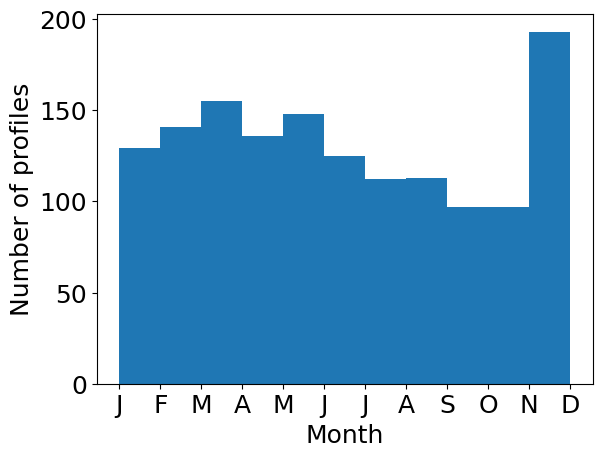

In [5]:
# histogram of distribution by month
xr.plot.hist(profiles_antarctic.month, bins=np.arange(1,13))
plt.xlabel('Month', fontsize=fs)
plt.ylabel('Number of profiles', fontsize=fs)
ms = ['J','F','M','A','M','J','J','A','S','O','N','D'];
plt.xticks(np.arange(1, 13, step=1), ms)
plt.tick_params(axis='x', labelsize=fs)
plt.tick_params(axis='y', labelsize=fs)
plt.savefig(ploc + descrip + '_hist_byMonth.png',bbox_inches='tight')
plt.savefig(ploc + descrip + '_hist_byMonth.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Temperature, salinity, and density structure

plot_tools.plot_many_profiles


ValueError: x and y must have same first dimension, but have shapes (100,) and (144, 100)

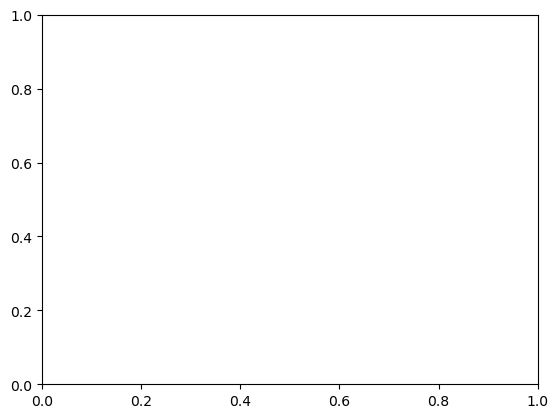

In [15]:
# make the "all profiles" plot
pt.plot_many_profiles(ploc, profiles_antarctic, frac = 0.10,
                      zmin = zmin, zmax = zmax,
                      Tmin = Trange[0], Tmax = Trange[1],
                      Smin = Srange[0], Smax = Srange[1],
                      sig0min = 27.0, sig0max = 27.85,
                      alpha = 0.01, modStr = '',
                      colorVal = 'black',
                      withDensity=False)

In [1]:
profiles_antarctic.PRES.shape()

NameError: name 'profiles_antarctic' is not defined

# testing new histogram plot, circumpolar

In [9]:
##################################################################
######  Set up Southern Ocean Map  ###############################
##################################################################

def map_southern_ocean_axes_setup(
    ax:                    matplotlib.axes.Axes,
    fig:                   matplotlib.figure.Figure,
    max_latitude:          float = -30,
    add_gridlines:         bool = True,
    color_land:            bool = False,
    land_edgecolor:        str = 'grey',
    land_facecolor:        str = 'grey',
    fontsize:              float = 10,
    map_facecolor:         str = 'white',
    coast_linewidth:       float = 0.3,
    gridlines_linewidth:   float = 0.5,
    girdlines_color:       str = 'grey',
    gridlines_alpha:       float = 0.5,
    longitude_label_color: str = 'grey',
    latitude_label_color:  str = 'grey'
) -> None:
    """
    This function sets up the subplot so that it is a cartopy map of the Southern Ocean.
    returns void as the ax and figure objects are pointers not data.
    Args:
        ax  (matplotlib.axes.Axes):     The axis object to add the map to.
        fig (matplotlib.figure.Figure): The figure object for the figure in general.
        add_gridlines (bool):           Whether or not to add gridlines to the plot.
    """
    
    
    ### Limit the map to -40 degrees latitude and below.
    ax.set_extent([-180, 180, -90, max_latitude+0.6], ccrs.PlateCarree())  # set to -29.4 for map out to 30 degrees or -39.4 for map out to 40 degrees
   
    ### Tune the subplot layout
    fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
    
    ### Make the background of the plot white
    ax.set_facecolor(map_facecolor)

    ### Make SO plot boundary a circle
    def plot_circle_boundary() -> None:
        """
        Make SO plot boundary a circle.
        Compute a circle in axes coordinates, which we can use as a boundary for the map.
        We can pan/zoom as much as we like - the boundary will be permanently circular.
        """
        theta  = np.linspace(0, 2 * np.pi, 100)
        center, radius = [0.5, 0.5], 0.5  ## could use 0.45 here, as Simon Thomas did
        verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax.set_boundary(circle, transform = ax.transAxes)

    plot_circle_boundary()


    ### Add gridlines (if True)
    if add_gridlines:
        ax.gridlines(color = girdlines_color, alpha = gridlines_alpha, linewidth = gridlines_linewidth)
        
                # specifying xlocs/ylocs yields number of meridian/parallel lines
        dmeridian = 60  # spacing for lines of meridian
        dparallel = 20  # spacing for lines of parallel -- can change this to 10
        num_merid = int(360/dmeridian + 1)
        num_parra = int(180/dparallel + 1)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                          xlocs=np.linspace(-180, 180, num_merid), 
                          ylocs=np.linspace(-90, 90, num_parra), 
                          linestyle="-", linewidth=0.5, color='grey', alpha=gridlines_alpha)
        
        # for label alignment
        va = 'center' # also bottom, top
        ha = 'center' # right, left
        degree_symbol = u'\u00B0'

        # for locations of (meridional/longitude) labels
        lond = np.linspace(-180, 180, num_merid)
        latd = np.zeros(len(lond))

        for (alon, alat) in zip(lond, latd):
            projx1, projy1 = ax.projection.transform_point(alon, max_latitude+1, ccrs.Geodetic())  # set to -29 for map out to 30 degrees or -39 for a map out to 40 degrees
            if alon>-180 and alon<0:
                ha = 'right'
                va = 'center'
            if alon>0 and alon<180:
                ha = 'left'
                va = 'center'
            if np.abs(alon-0)<0.01:
                ha = 'center'
                va = 'bottom'
            if alon==-180:
                ha = 'center'
                va = 'top'
            if (alon<180):
                txt =  ' {0} '.format(str(int(alon)))+degree_symbol
                ax.text(projx1, projy1, txt, va=va, ha=ha, color=latitude_label_color, fontsize=fontsize)
                
        # for locations of (meridional/longitude) labels select longitude: 315 for label positioning
        lond2 = 60*np.ones(len(lond))
        latd2 = np.linspace(-90, 90, num_parra)
        va, ha = 'center', 'center'
        for (alon, alat) in zip(lond2, latd2):
            projx1, projy1 = ax.projection.transform_point(alon, alat, ccrs.Geodetic())
            txt =  ' {0} '.format(str(int(alat)))+degree_symbol
            ax.text(projx1, projy1, txt, va=va, ha=ha, color=longitude_label_color, fontsize=fontsize) 
        
        
    ### Add in coastlines/features
    if color_land:
        ax.add_feature(cfeature.LAND, zorder=0, linewidth = coast_linewidth, edgecolor=land_edgecolor, facecolor=land_facecolor)
    else:
        ax.coastlines(resolution = "50m", linewidth = coast_linewidth)

In [10]:
###### UNIVERSAL PLOT PARAMETERS FOR TALK ###### -- note that these sizes are for a talk, may need smaller sizes for manuscript


#### FIGURE SIZE
sidebar_fig_width = 12 # inches


#### FONT SIZES
fontsize_large  = 10
fontsize_medium = 8
fontsize_small  = 6

#### MARKER SIZES
markersize  = 0.25


#### PALETTES
muted_palette = {'lightblue'       :'#88CCEE', 
                 'teal'            :'#44AA99', 
                 'mediumtealgreen' :'#339977',
                 'darkgreenteal'   :'#2B9166',
                 'darkgreen'       :'#117733', 
                 'darkblue'        :'#332288', 
                 'mediumblue'      :'#4169E1',
                 'mustardyellow'   :'#DDCC77', 
                 'darkyellow'      :'#999933',
                 'darkcoral'       :'#CC6677', 
                 'darkviolet'      :'#882255', 
                 'darkerviolet'    :'#7A1F6A',
                 'pinkpurple'      :'#AA4499', 
                 'lightgrey'       :'#DDDDDD'}

deep_palette = {'greywhite'       : '#E6F1F1',
                'lightgreyblue'   : '#D8EAEC',
                'mediumgreyblue'  : '#C7E2E7',
                'mediumlightblue' : '#AFD5E3',
                'mediumblue'      : '#90C2E2',
                'mediumdarkblue'  : '#7EB0E4',
                'periwinkle'      : '#7395E4',
                'darkperwinkle'   : '#7870D4',
                'purple'          : '#784AAE',
                'darkplum'        : '#682472',
                'mauve'           : '#471236',
                'darkmauve'       : '#380F25'}

grays_palette = {'darkgray'        : '#333333', 
                 'mediumdarkgray'  : '#666666', 
                 'mediumlightgray' : '#999999', 
                 'lightgray'       : '#cccccc',}

bright_pink = '#FA5BBB'
argo_yellow = '#EBD952'

par_color       = '#FFAD41'
dark_chl_color  = '#0A6E44'
light_chl_color = '#94D1BF'


#### PLOT COLORS
plot_facecolor          = deep_palette['greywhite']  # '#D1E7F4'  # '#EFF3FC'
overplot_label_color    = '#7B878F'  # '#EFF3FC'  # very light blue-grey
darker_label_color      = '#C9CCD4'  # darker version of above
background_poster_color = '#14417C'


#### DATA COLORS
cm_thermal_almost_black = '#042333'
cm_thermal_deep_plum    = '#563B9C'
cm_thermal_merlo        = '#B05F82'
cm_thermal_orange       = '#F99242'
cm_thermal_yellow       = '#e8fa5b'
chl_green               = '#1fa187'

#### MAP COLORS
# front_colors = {'SAF':'#3F4D61', 'PF':'#586C87','SIZ':'#8FAFDB','STF':'#F8F2C3'}
# sector_line_colors = '#A990D6'

# front_colors = {'STF':deep_palette['darkperwinkle'], 'SAF':deep_palette['periwinkle'], 'PF':deep_palette['mediumdarkblue'],'SIZ':deep_palette['mediumblue']}
front_colors = {'STF':grays_palette['mediumdarkgray'], 'SAF':grays_palette['mediumdarkgray'], 'PF':grays_palette['mediumdarkgray'],'SIZ':grays_palette['mediumdarkgray']}
sector_line_colors = deep_palette['darkplum']

# Floats colored by zone
# float_zone_colors = {'siz' : 'mediumpurple', 'asz' : 'orange', 'pfz' : 'royalblue', 'saz' : 'C3', 'stz' : 'C2'}
float_zone_colors = {'siz' : muted_palette['mediumtealgreen'], 'asz' : muted_palette['mediumblue'], 'pfz' : muted_palette['mustardyellow'], 'saz' : muted_palette['darkcoral'], 'stz' : muted_palette['darkerviolet']}


argo_float_color = '#FFA5CE' # muted_palette['teal']
sp_comp_color    = '#FF9E4C'  ## '#FFD775'

<Figure size 640x480 with 0 Axes>

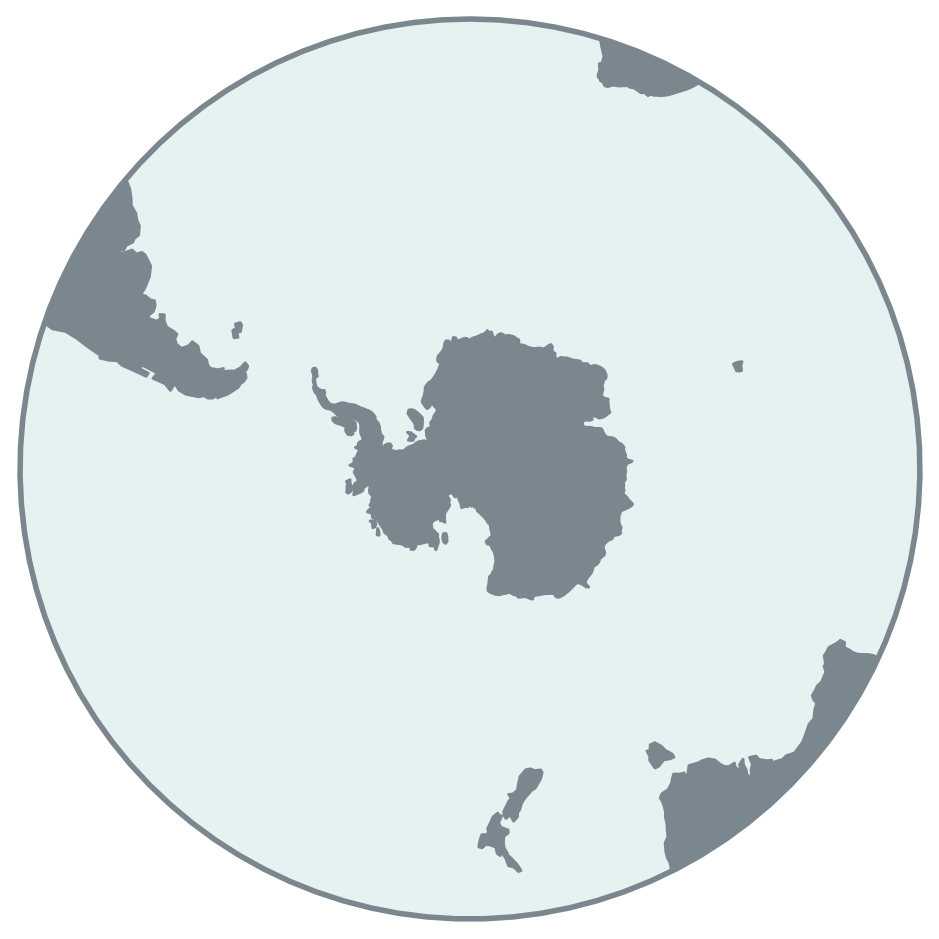

In [11]:
##############################
########## Set up ############
##############################

###### SAVE NAME ######
savedate = date.today().strftime('%Y%m%d')
savepath = ploc
savename = 'map_histogram_circumpolar'

plt.rcParams["axes.edgecolor"] = overplot_label_color
plt.rcParams["axes.linewidth"] = 2
plt.figure(facecolor='none') 

###### SET UP PLOT ######
map_proj = ccrs.SouthPolarStereo()

fig  = plt.figure(figsize=[5, 5], dpi=200) # inches
ax1  = plt.subplot(projection = map_proj)



##############################################################################
#########################   MAP WITHOUT DATA   ###############################
##############################################################################

###### SET UP MAP ######
# Set up plot axes
map_southern_ocean_axes_setup(ax1, fig, add_gridlines = False, color_land = True,
                              land_facecolor = overplot_label_color,
                              land_edgecolor = overplot_label_color,
                              fontsize = fontsize_large,
                              map_facecolor = plot_facecolor, #'#d7dce8',
                              coast_linewidth = 1,
                              gridlines_linewidth  = 4,
                              girdlines_color = 'grey',
                              gridlines_alpha = 0.1,
                              longitude_label_color = darker_label_color,
                              latitude_label_color  = overplot_label_color)
# note that currently, latitude labels extend too far -- can't figure out how to cut them off outside of the plot

# # Plot fronts and sea ice
# ax1.plot( pf.lon,  pf.lat,   label= 'PF',   zorder = 1, markersize=markersize, marker='o',linestyle='', color=front_colors['PF'],    transform=ccrs.PlateCarree())
# ax1.plot(saf.lon, saf.lat,   label='SAF',   zorder = 1, markersize=markersize, marker='o',linestyle='', color=front_colors['SAF'],   transform=ccrs.PlateCarree())
# ax1.plot(siz.lon, siz.lat,   label='SIZ',   zorder = 1, markersize=markersize, marker='o',linestyle='', color=front_colors['SIZ'],   transform=ccrs.PlateCarree())
# ax1.plot(stf.lon, stf.lat,   label='STF',   zorder = 1, markersize=markersize, marker='o',linestyle='', color=front_colors['STF'],   transform=ccrs.PlateCarree())



#plot profiles sorted by frontal zone
float_alpha = 0.2
float_point_size = 0.4
# ax1.scatter(lon_siz_fl, lat_siz_fl, c=float_zone_colors['siz'], alpha=float_alpha, s=float_point_size, zorder=0, transform=ccrs.PlateCarree())




###### SAVE PLOT ######
plt.savefig(savepath + savename + '_' + savedate + '.png', format='png', bbox_inches='tight')
plt.savefig(savepath + savename                  + '.png', format='png', bbox_inches='tight')
plt.show()

In [86]:
#####################################################################
# Plot histogram of profile locations
#####################################################################


# def plot_histogram_of_profile_locations_circumpolar(
#     ax                   : matplotlib.axes.Axes,
#     fig                  : matplotlib.figure.Figure,
#     profiles,
#     figsize                      = [5,5],
#     fig_dpi              : float = 200,
#     savepath                     = ploc,
#     lon_range                    = (-180, 180),
#     lat_range                    = ( -85, -30),
#     add_bathymetry       : bool  = False,
#     bathy_fname          : str   = "bathy.nc",
#     source               : str   = 'all',
#     binsize              : float = 2,
#     lev_range                    = range(-6000,1,500),
#     myPlotLevels         : float = 30, 
#     vmin                 : float = 0, 
#     vmax                 : float = 200,
#     add_gridlines        : bool  = True,
#     color_land           : bool  = False,
#     plot_edgecolor       : str   = 'grey',
#     land_edgecolor       : str   = 'grey',
#     land_facecolor       : str   = 'grey',
#     fontsize             : float = 10,
#     map_facecolor        : str   = 'white',
#     plot_linewidth       : float = 2,
#     coast_linewidth      : float = 0.3,
#     gridlines_linewidth  : float = 0.5,
#     girdlines_color      : str   = 'grey',
#     gridlines_alpha      : float = 0.5,
#     longitude_label_color: str   = 'grey',
#     latitude_label_color : str   = 'grey'
# ) -> None:
    # """
    # This function sets up the subplot so that it is a cartopy map of the Southern Ocean.
    # returns void as the ax and figure objects are pointers not data.
    # Args:
    #     ax  (matplotlib.axes.Axes):     The axis object to add the map to.
    #     fig (matplotlib.figure.Figure): The figure object for the figure in general.
    #     add_gridlines (bool):           Whether or not to add gridlines to the plot.
    # """



def plot_histogram_of_profile_locations_circumpolar(ploc, profiles, lon_range, lat_range,
                                                    source='all', 
                                                    binsize=2,
                                                    add_bathymetry = False,
                                                    bathy_fname    = "bathy.nc",
                                                    lev_range      = range(-6000,1,500),
                                                    myPlotLevels   = 30, 
                                                    vmin           = 0, 
                                                    vmax           = 200,
                                                    plot_edgecolor = 'grey',
                                                    plot_linewidth = 2,
                                                    figsize        = [5,5],
                                                    fig_dpi        = 200):
    
    
    
    
    
#
# source : may be 'argo', 'ctd', 'seal', or 'all'
# binsize : size of  lat-lon bins in degrees
#
    
    from xhistogram.xarray import histogram
    
    # print
    print("plot_tools.plot_histogram_of_profile_locations")
    
    
    ###### SAVE NAME ######
    savedate = date.today().strftime('%Y%m%d')
    savepath = ploc
    savename = 'map_histogram_circumpolar'

    plt.rcParams["axes.edgecolor"] = plot_edgecolor
    plt.rcParams["axes.linewidth"] = plot_linewidth
    plt.figure(facecolor='none') 


    ###### SELECT DATA ######
    if source=='all':
        df = profiles
    else:
        df = profiles.where(profiles.source==source, drop=True)

    # bins
    lon_bins = np.arange(lon_range[0], lon_range[1]+binsize, binsize)
    lat_bins = np.arange(lat_range[0], lat_range[1]+binsize, binsize)

    # histogram
    hLatLon = histogram(df.lon, df.lat, bins=[lon_bins, lat_bins])

    # load bathymetry
    if add_bathymetry == True:
        bds = io.load_bathymetry(bathy_fname)
        bathy_lon = bds['lon'][:]
        bathy_lat = bds['lat'][:]
        bathy = bds['bathy'][:]
    
    
    ###### SET UP PLOT ######
    map_proj = ccrs.SouthPolarStereo()

    fig  = plt.figure(figsize=figsize, dpi=fig_dpi) # inches
    ax1  = plt.subplot(projection = map_proj)
    
    
    ###### SET UP MAP ######
    # Set up plot axes
    map_southern_ocean_axes_setup(ax1, fig, add_gridlines = False, color_land = True,
                                  land_facecolor = overplot_label_color,
                                  land_edgecolor = overplot_label_color,
                                  fontsize = fontsize_large,
                                  map_facecolor = plot_facecolor, #'#d7dce8',
                                  coast_linewidth = 1,
                                  gridlines_linewidth  = 4,
                                  girdlines_color = 'grey',
                                  gridlines_alpha = 0.1,
                                  longitude_label_color = darker_label_color,
                                  latitude_label_color  = overplot_label_color)


    # cartopy plot
    # plt.figure(figsize=(17, 13))
    # ax = plt.axes(projection=ccrs.PlateCarree())
    # ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
    #                 ccrs.PlateCarree())
    # colormesh histogram
    CS = plt.pcolormesh(lon_bins, lat_bins, hLatLon.T, cmap=cmo.thermal, transform=ccrs.PlateCarree(), zorder=0)
    
    ### Add in coastlines/features
    coast_linewidth = 1
    land_facecolor  = overplot_label_color
    land_edgecolor  = overplot_label_color
    ax1.add_feature(cfeature.LAND, zorder=1, linewidth = coast_linewidth, edgecolor=land_edgecolor, facecolor=land_facecolor)
    # ax1.coastlines(resolution = "50m", linewidth = coast_linewidth)
    
    plt.clim(vmin, vmax)
    # ax.coastlines(resolution='50m',color='white')
    # ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    #              linewidth=2, color='gray', alpha=0.5, linestyle='--')
    # ax.add_feature(cartopy.feature.LAND)
    
    
#     colors = mcp.gen_color(cmap='cmo.thermal',n=5)
    
#     my_colormap = clr.LinearSegmentedColormap.from_list('RADAR', colors)
#     VariableLimits = np.array([1, 2, 4, 6, 8, 10])
#     norm = clr.BoundaryNorm(np.append(0, VariableLimits), ncolors=5)

#     fig, ax = plt.subplots()
#     pm = ax.scatter(np.random.rand(100), np.random.rand(100), c=np.random.uniform(0, 120, 100),
#                     cmap=my_colormap, norm=norm)
#     cbar = fig.colorbar(pm, ticks=VariableLimits, pad=0.1, ax=ax)
#     cbar.ax.set_title('(mm)', size=8)
#     cbar.ax.tick_params(left=True, right=False, labelleft=True, labelright=False)
    
    
    
    
    
    
    ###### SAVE PLOT ######
    plt.savefig(ploc + savename + '_' + savedate + '.png', format='png', bbox_inches='tight', transparent=True)
    plt.savefig(ploc + savename                  + '.png', format='png', bbox_inches='tight', transparent=True)
    plt.savefig(ploc + savename + '_' + savedate + '.pdf', format='pdf', bbox_inches='tight', transparent=True)
    plt.savefig(ploc + savename                  + '.pdf', format='pdf', bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

    # separate colorbar
    a = np.array([[vmin,vmax]])
    plt.figure(figsize=(9, 1.5))
    img = plt.imshow(a, cmap=discrete_cmap(10, cmo.thermal))
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    cbar = plt.colorbar(orientation="horizontal", cax=cax)
    
    # set colorbar tick color
    cbar.ax.xaxis.set_tick_params(color=overplot_label_color)

    # set colorbar edgecolor 
    cbar.outline.set_edgecolor(overplot_label_color)

    # set colorbar ticklabels
    plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color=overplot_label_color)
    
    cbar.ax.tick_params(labelsize=22)
    plt.savefig(savepath + 'histogram_latlon_map_colorbar.png', bbox_inches='tight', transparent=True)
    plt.savefig(savepath + 'histogram_latlon_map_colorbar.pdf', bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

plot_tools.plot_histogram_of_profile_locations


<Figure size 640x480 with 0 Axes>

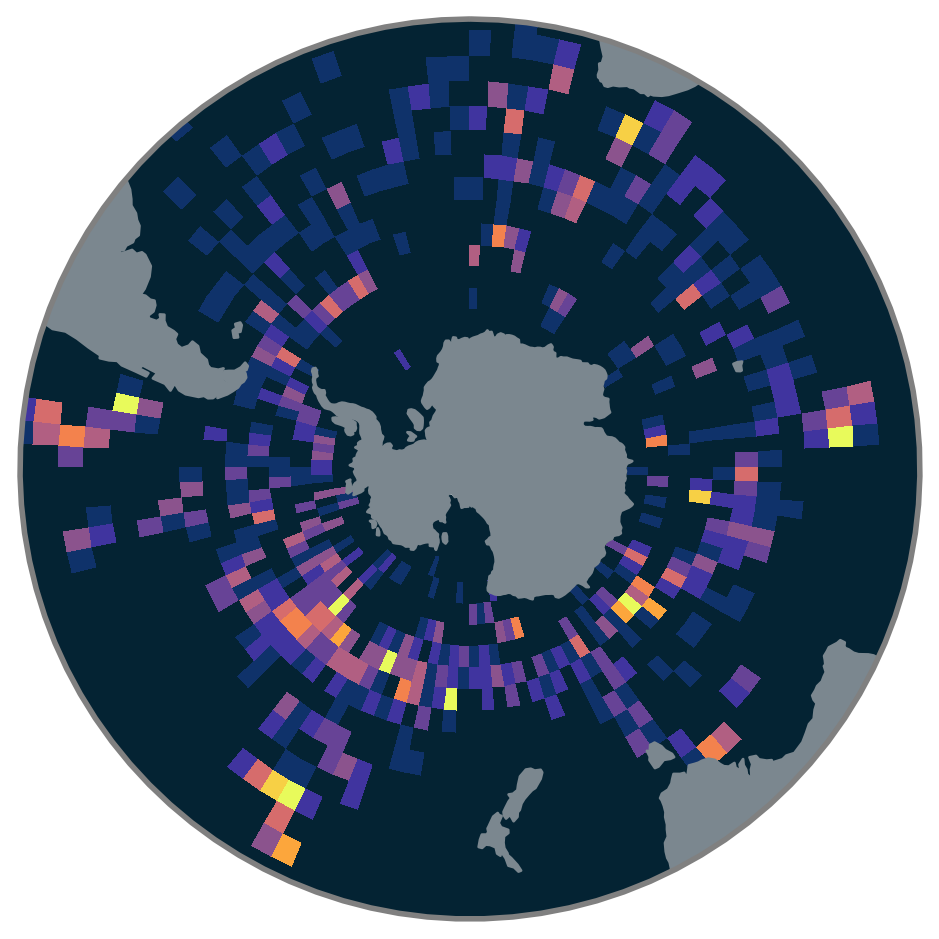

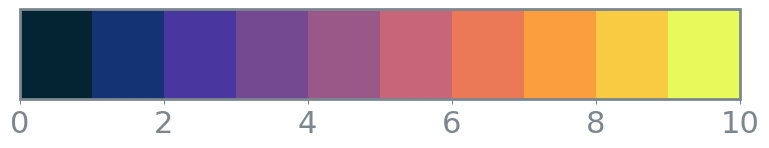

In [87]:
# histogram of profile locations
plot_histogram_of_profile_locations_circumpolar(ploc, profiles_antarctic, lon_range, lat_range, source='all', binsize=3, vmax=10)

# make zero profiles white

In [58]:
np.arange(lon_range[0], lon_range[1]+2, 2)

array([-180, -178, -176, -174, -172, -170, -168, -166, -164, -162, -160,
       -158, -156, -154, -152, -150, -148, -146, -144, -142, -140, -138,
       -136, -134, -132, -130, -128, -126, -124, -122, -120, -118, -116,
       -114, -112, -110, -108, -106, -104, -102, -100,  -98,  -96,  -94,
        -92,  -90,  -88,  -86,  -84,  -82,  -80,  -78,  -76,  -74,  -72,
        -70,  -68,  -66,  -64,  -62,  -60,  -58,  -56,  -54,  -52,  -50,
        -48,  -46,  -44,  -42,  -40,  -38,  -36,  -34,  -32,  -30,  -28,
        -26,  -24,  -22,  -20,  -18,  -16,  -14,  -12,  -10,   -8,   -6,
         -4,   -2,    0,    2,    4,    6,    8,   10,   12,   14,   16,
         18,   20,   22,   24,   26,   28,   30,   32,   34,   36,   38,
         40,   42,   44,   46,   48,   50,   52,   54,   56,   58,   60,
         62,   64,   66,   68,   70,   72,   74,   76,   78,   80,   82,
         84,   86,   88,   90,   92,   94,   96,   98,  100,  102,  104,
        106,  108,  110,  112,  114,  116,  118,  1

In [98]:
from xhistogram.xarray import histogram

#longitude and latitude range
lon_min = -180
lon_max =  180
lat_min = -85
lat_max = -30

# depth range
zmin = 20.0
zmax = 1000.0

# ranges
lon_range   = (lon_min, lon_max)
lat_range   = (lat_min, lat_max)
depth_range = (zmin, zmax)

hLatLon = histogram(profiles_antarctic.lon, profiles_antarctic.lat, bins=[lon_range, lat_range])
hLatLon.T[0][0]

<xarray.DataArray 'histogram_lon_lat' ()>
array(1236)
Coordinates:
    lon_bin  float64 0.0
    lat_bin  float64 -57.5

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

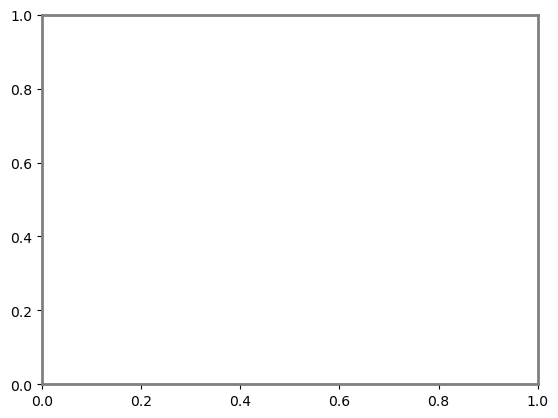

In [100]:
plt.pcolormesh(lon_range, lat_range, hLatLon.T, cmap=cmo.thermal, transform=ccrs.PlateCarree(), zorder=0)

In [101]:
colors = mcp.gen_color(cmap='cmo.thermal',n=5)
print(colors)

['#042333', '#563b9c', '#b15f82', '#f99341', '#e8fa5b']


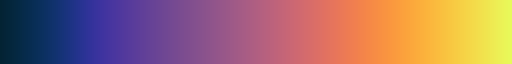

In [35]:
cmocean.cm.thermal

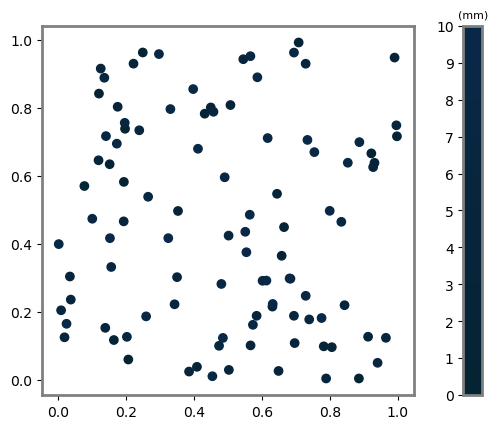

In [62]:
colors = mcp.gen_color(cmap='cmo.thermal',n=10)

my_colormap = matplotlib.colors.LinearSegmentedColormap.from_list('RADAR', colors)
VariableLimits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
norm = matplotlib.colors.BoundaryNorm(VariableLimits, ncolors=10)

fig, ax = plt.subplots()
pm = ax.scatter(np.random.rand(100), np.random.rand(100), c=np.random.uniform(0, 10, 100),
                cmap=my_colormap, norm=norm)
cbar = fig.colorbar(pm, ticks=VariableLimits, pad=0.1, ax=ax)
cbar.ax.set_title('(mm)', size=8)
cbar.ax.tick_params(left=True, right=False, labelleft=True, labelright=False)

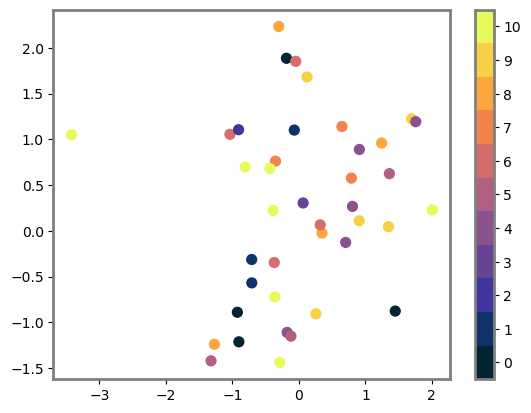

In [88]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


# if __name__ == '__main__':
N = 11


x = np.random.randn(40)
y = np.random.randn(40)
c = np.random.randint(N, size=40)

# Edit: don't use the default ('jet') because it makes @mwaskom mad...
plt.scatter(x, y, c=c, s=50, cmap=discrete_cmap(N, cmo.thermal))
plt.colorbar(ticks=range(N))
plt.clim(-0.5, N - 0.5)
plt.show()

In [71]:
base = plt.cm.get_cmap(cmo.thermal)

In [72]:
base(np.linspace(0, 1, 10))

array([[0.01555601, 0.13824425, 0.20181089, 1.        ],
       [0.07401398, 0.19859437, 0.44523225, 1.        ],
       [0.28706751, 0.21246914, 0.624642  , 1.        ],
       [0.45356026, 0.28651338, 0.57417648, 1.        ],
       [0.60519167, 0.34651565, 0.53713308, 1.        ],
       [0.77502298, 0.39893446, 0.46735   , 1.        ],
       [0.91997406, 0.47257868, 0.34367638, 1.        ],
       [0.98486309, 0.61928934, 0.24183204, 1.        ],
       [0.97288357, 0.79623051, 0.2634262 , 1.        ],
       [0.90904184, 0.98215741, 0.35550781, 1.        ]])

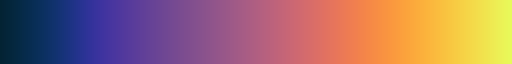

In [89]:
plt.cm.get_cmap(cmo.thermal)